In [30]:
import pandas as pd

In [31]:
def calculate_score(df):
    def calculate_row_score(row):
        gaze_score = 50 if row['gaze'] == 1 else 0
        blink_penalty = -20 if row['blink'] == 1 else 0

        eye_offset_penalty = -max(0, row['eye_offset'] - 15)

        final_score = gaze_score + blink_penalty + eye_offset_penalty
        return final_score

    df['score'] = df.apply(calculate_row_score, axis = 1)
    final_score = df['score'].mean()


    return final_score

list_of_dfs = [pd.read_csv(f'gaze_{i}.csv') for i in range(1, 11)]

results = []

for i, candidate_df in enumerate(list_of_dfs):
    final_score = calculate_score(candidate_df)
    results.append({'Candidate': i+1, 'Final Score_gaze': final_score})

results_df = pd.DataFrame(results)
Gaze_final_scores = results_df.to_csv('gaze_results.csv', index=False)
print(results_df)

   Candidate  Final Score_gaze
0          1         22.955483
1          2         19.799440
2          3          4.644786
3          4         27.919785
4          5         45.000000
5          6         50.000000
6          7         27.031844
7          8         44.957317
8          9         46.595138
9         10         27.000931


In [32]:
import pandas as pd

dfs = []

for i in range(1, 11):
    file_path = f"/content/gaze_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

candidate_with_highest_deviation = None
highest_deviation = 0.0

for i, df in enumerate(dfs):
    avg_eye_offset = df['eye_offset'].mean()

    eye_offset_deviation = df['eye_offset'] - avg_eye_offset

    max_deviation = eye_offset_deviation.abs().max()

    if max_deviation > highest_deviation:
        highest_deviation = max_deviation
        candidate_with_highest_deviation = f'Candidate {i + 1}'

print(f'The candidate with the highest eye offset deviation is: {candidate_with_highest_deviation}')
print(f'Highest eye offset deviation value: {highest_deviation}')


The candidate with the highest eye offset deviation is: Candidate 7
Highest eye offset deviation value: 80.31794827586208


In [33]:
import pandas as pd

dfs = []

for i in range(1, 11):
    file_path = f"/content/gaze_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

average_deviations = {}

for i, df in enumerate(dfs):
    avg_eye_offset = df['eye_offset'].mean()
    eye_offset_deviation = df['eye_offset'] - avg_eye_offset
    average_deviation = abs(eye_offset_deviation).mean()
    average_deviations[f'Candidate {i + 1}'] = average_deviation

sorted_candidates = sorted(average_deviations.items(), key=lambda x: x[1], reverse=True)

print("Candidates with Highest to Lowest Eye Offset Deviation:")
for candidate, deviation in sorted_candidates:
    print(f"{candidate}: {deviation:.2f}")


Candidates with Highest to Lowest Eye Offset Deviation:
Candidate 7: 18.69
Candidate 1: 15.77
Candidate 4: 15.55
Candidate 3: 14.84
Candidate 10: 14.73
Candidate 2: 11.81
Candidate 9: 7.15
Candidate 8: 7.04
Candidate 5: 3.99
Candidate 6: 0.26


In [34]:
df = pd.read_csv('/content/metadata_1.csv')
df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,6,e2aa9258-47a5-46ab-9c5c-283460f7a807,7.0,2023-09-17 07:58:15,0.0
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,7,e2aa9258-47a5-46ab-9c5c-283460f7a807,8.0,2023-09-17 07:58:15,0.0
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,11,e2aa9258-47a5-46ab-9c5c-283460f7a807,12.0,2023-09-17 07:58:15,0.0
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,13,e2aa9258-47a5-46ab-9c5c-283460f7a807,14.0,2023-09-17 07:58:15,0.0
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,14,e2aa9258-47a5-46ab-9c5c-283460f7a807,15.0,2023-09-17 07:58:15,0.0


In [39]:
import pandas as pd

gaze_files = [f'/content/gaze_{i}.csv' for i in range(1, 11)]
metadata_files = [f'/content/metadata_{i}.csv' for i in range(1, 11)]

def extract_and_merge(gaze_file, metadata_file):
    df_gaze = pd.read_csv(gaze_file)
    df_metadata = pd.read_csv(metadata_file)

    df_gaze_extracted = df_gaze[['gaze']]
    df_metadata_extracted = df_metadata[['elapsed_time']]

    merged_df = pd.concat([df_gaze_extracted, df_metadata_extracted], axis=1)

    return merged_df

merged_datasets = []
for gaze_file, metadata_file in zip(gaze_files, metadata_files):
    merged_df = extract_and_merge(gaze_file, metadata_file)
    merged_datasets.append(merged_df)

for i, merged_df in enumerate(merged_datasets, start=1):
    merged_df.to_csv(f'new_combined_{i}.csv', index=False)
    print(f'Merged dataset {i} saved as merged_extracted_{i}.csv')

Merged dataset 1 saved as merged_extracted_1.csv
Merged dataset 2 saved as merged_extracted_2.csv
Merged dataset 3 saved as merged_extracted_3.csv
Merged dataset 4 saved as merged_extracted_4.csv
Merged dataset 5 saved as merged_extracted_5.csv
Merged dataset 6 saved as merged_extracted_6.csv
Merged dataset 7 saved as merged_extracted_7.csv
Merged dataset 8 saved as merged_extracted_8.csv
Merged dataset 9 saved as merged_extracted_9.csv
Merged dataset 10 saved as merged_extracted_10.csv


In [49]:
import pandas as pd

gaze_files = [f'/content/gaze_{i}.csv' for i in range(1, 11)]
emotion_files = [f'/content/emotion_{i}.csv' for i in range(1, 11)]

def extract_and_merge(gaze_file, metadata_file):
    df_gaze = pd.read_csv(gaze_file)
    df_emotion = pd.read_csv(metadata_file)

    df_gaze_extracted = df_gaze[['gaze']]
    df_emotion_extracted = df_emotion[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]

    merged_df = pd.concat([df_gaze_extracted, df_emotion_extracted], axis=1)

    return merged_df

merged_datasets = []
for gaze_file, emotion_file in zip(gaze_files, emotion_files):
    merged_df = extract_and_merge(gaze_file, emotion_file)
    merged_datasets.append(merged_df)

for i, merged_df in enumerate(merged_datasets, start=1):
    merged_df.to_csv(f'merged_extracted_{i}.csv', index=False)
    print(f'Merged dataset {i} saved as merged_extracted_{i}.csv')

Merged dataset 1 saved as merged_extracted_1.csv
Merged dataset 2 saved as merged_extracted_2.csv
Merged dataset 3 saved as merged_extracted_3.csv
Merged dataset 4 saved as merged_extracted_4.csv
Merged dataset 5 saved as merged_extracted_5.csv
Merged dataset 6 saved as merged_extracted_6.csv
Merged dataset 7 saved as merged_extracted_7.csv
Merged dataset 8 saved as merged_extracted_8.csv
Merged dataset 9 saved as merged_extracted_9.csv
Merged dataset 10 saved as merged_extracted_10.csv


In [55]:
import pandas as pd

gaze_files = [f'/content/gaze_{i}.csv' for i in range(1, 11)]
emotion_files = [f'/content/emotion_{i}.csv' for i in range(1, 11)]

def extract_and_merge(gaze_file, metadata_file):
    df_gaze = pd.read_csv(gaze_file)
    df_emotion = pd.read_csv(metadata_file)

    df_gaze_extracted = df_gaze[['blink','gaze']]
    df_emotion_extracted = df_emotion[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral','dominant_emotion']]

    merged_df = pd.concat([df_gaze_extracted, df_emotion_extracted], axis=1)

    return merged_df

merged_datasets = []
for gaze_file, emotion_file in zip(gaze_files, emotion_files):
    merged_df = extract_and_merge(gaze_file, emotion_file)
    merged_datasets.append(merged_df)

for i, merged_df in enumerate(merged_datasets, start=1):
    merged_df.to_csv(f'second_extracted_{i}.csv', index=False)
    print(f'Merged dataset {i} saved as merged_extracted_{i}.csv')

Merged dataset 1 saved as merged_extracted_1.csv
Merged dataset 2 saved as merged_extracted_2.csv
Merged dataset 3 saved as merged_extracted_3.csv
Merged dataset 4 saved as merged_extracted_4.csv
Merged dataset 5 saved as merged_extracted_5.csv
Merged dataset 6 saved as merged_extracted_6.csv
Merged dataset 7 saved as merged_extracted_7.csv
Merged dataset 8 saved as merged_extracted_8.csv
Merged dataset 9 saved as merged_extracted_9.csv
Merged dataset 10 saved as merged_extracted_10.csv


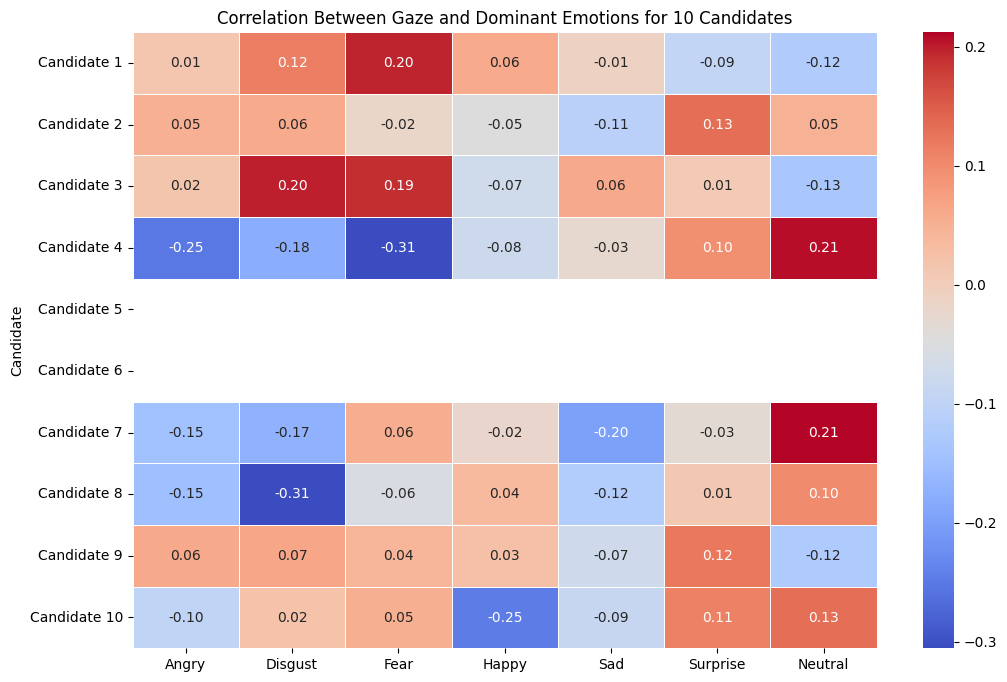

In [51]:

correlation_coefficients = []


for i in range(1, 11):
    file_path = f"/content/merged_extracted_{i}.csv"
    df = pd.read_csv(file_path)

    correlation_data = df[['gaze', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].corr()

    correlation_dict = {
        'Candidate': f'Candidate {i}',
        'Angry': correlation_data.loc['gaze', 'angry'],
        'Disgust': correlation_data.loc['gaze', 'disgust'],
        'Fear': correlation_data.loc['gaze', 'fear'],
        'Happy': correlation_data.loc['gaze', 'happy'],
        'Sad': correlation_data.loc['gaze', 'sad'],
        'Surprise': correlation_data.loc['gaze', 'surprise'],
        'Neutral': correlation_data.loc['gaze', 'neutral']
    }

    correlation_coefficients.append(correlation_dict)


correlation_df = pd.DataFrame(correlation_coefficients)

correlation_df.set_index('Candidate', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Gaze and Dominant Emotions for 10 Candidates')
plt.show()

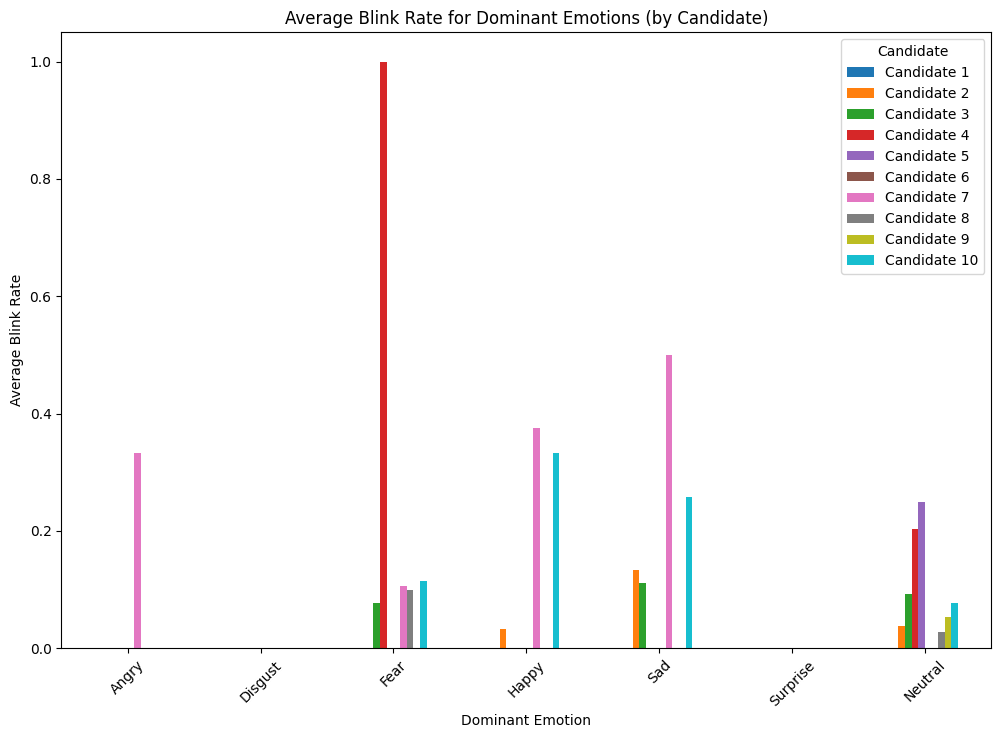

In [56]:

dfs = []


for i in range(1, 11):
    file_path = f"/content/second_extracted_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

emotion_mapping = {
    'angry': 'Angry',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happy',
    'sad': 'Sad',
    'surprise': 'Surprise',
    'neutral': 'Neutral'
}

avg_blink_rates = []

for i, df in enumerate(dfs):
    candidate_avg_blink_rate = {}
    for emotion_code, emotion_name in emotion_mapping.items():
        avg_blink_rate = df[df['dominant_emotion'] == emotion_code]['blink'].mean()
        candidate_avg_blink_rate[emotion_name] = avg_blink_rate
    avg_blink_rates.append(candidate_avg_blink_rate)

avg_blink_rates_df = pd.DataFrame(avg_blink_rates)
avg_blink_rates_df.index = [f'Candidate {i + 1}' for i in range(10)]

avg_blink_rates_df = avg_blink_rates_df.transpose()

plt.figure(figsize=(12, 8))
sns.set_palette("tab10")
avg_blink_rates_df.plot(kind='bar', ax=plt.gca())
plt.title('Average Blink Rate for Dominant Emotions (by Candidate)')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Blink Rate')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.show()

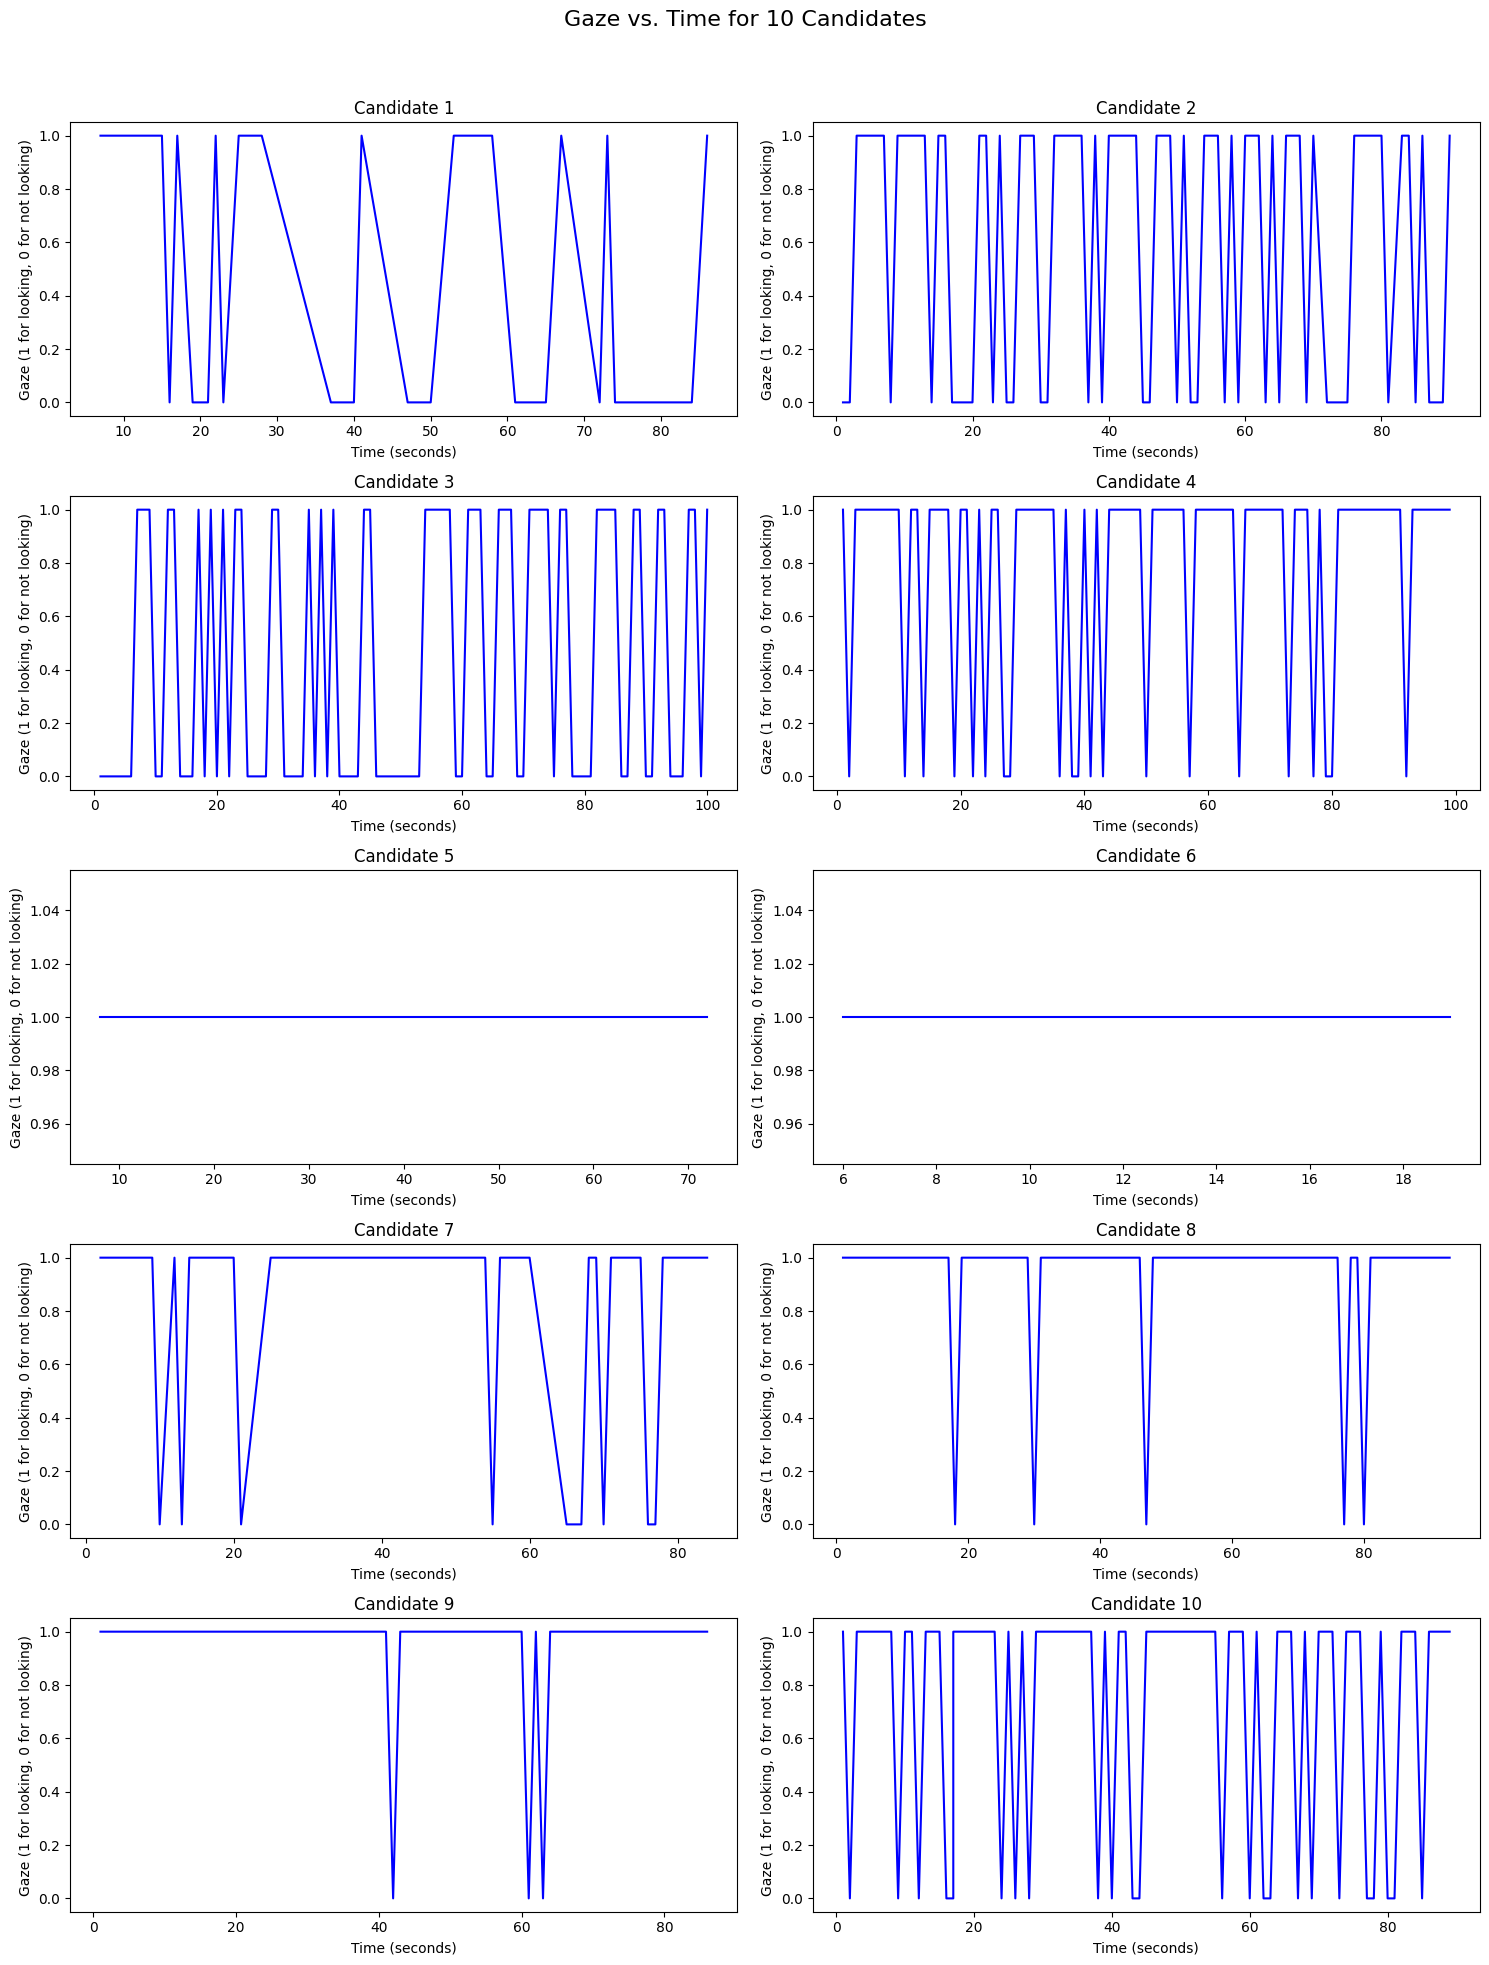

Candidates ranked by the percentage of time looking at the camera (High to Low):
Candidate 9: 96.51%
Candidate 8: 94.62%
Candidate 7: 80.95%
Candidate 4: 78.79%
Candidate 10: 73.33%
Candidate 1: 63.95%
Candidate 2: 58.89%
Candidate 3: 45.00%


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = []

for i in range(1, 11):
    file_path = f"/content/new_combined_{i}.csv"
    df = pd.read_csv(file_path)
    dfs.append(df)

median_row_count = int(pd.concat(dfs)['elapsed_time'].count() / len(dfs))

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Gaze vs. Time for 10 Candidates', fontsize=16)

percentage_time_looking = {}

for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    ax.plot(df['elapsed_time'], df['gaze'], label='Gaze', color='b')
    ax.set_title(f'Candidate {i + 1}')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Gaze (1 for looking, 0 for not looking)')

    total_rows = df['elapsed_time'].max()
    time_looking = df['gaze'].sum()
    percentage_looking = (time_looking / total_rows) * 100
    percentage_time_looking[f'Candidate {i + 1}'] = percentage_looking

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

sorted_candidates = sorted(percentage_time_looking.items(), key=lambda x: x[1], reverse=True)

filtered_candidates = [candidate for candidate, percentage in sorted_candidates if dfs[int(candidate.split()[-1]) - 1].shape[0] > median_row_count]

print("Candidates ranked by the percentage of time looking at the camera (High to Low):")
for candidate in filtered_candidates:
    print(f"{candidate}: {percentage_time_looking[candidate]:.2f}%")